In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [78]:
aqi = pd.read_csv("data/AQI.csv").dropna().drop(columns=[])

In [79]:
aqi

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,AQI,Green_Cover
0,0,0,0,0,29.8,59.100000,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,141.0,39.09
1,1,1,1,1,28.3,75.600000,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,163.0,12.63
2,2,2,2,2,23.1,74.700000,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,117.0,15.59
3,3,3,3,3,27.1,39.100000,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,53.0,38.15
4,4,4,4,4,26.5,70.700000,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,56.0,42.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,4995,4995,40.6,74.100000,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,463.0,11.02
4996,4996,4996,4996,4996,28.1,87.199859,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,110.0,26.51
4997,4997,4997,4997,4997,25.9,78.200000,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,131.0,32.75
4998,4998,4998,4998,4998,25.3,44.400000,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,34.0,58.07


In [80]:
aqi[['Proximity_to_Industrial_Areas', 'Population_Density', 'Green_Cover', 'AQI']].describe()

,Proximity_to_Industrial_Areas,Population_Density,Green_Cover,AQI
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,8.425400,497.423800,30.694480,172.00940
std,3.610944,152.754084,13.134288,129.66907
min,2.500000,188.000000,10.020000,23.00000
25%,5.400000,381.000000,19.980000,79.00000
50%,7.900000,494.000000,28.130000,118.00000
75%,11.100000,600.000000,41.332500,236.25000
max,25.800000,957.000000,59.940000,677.00000


In [81]:
AQI = aqi.sample(100)

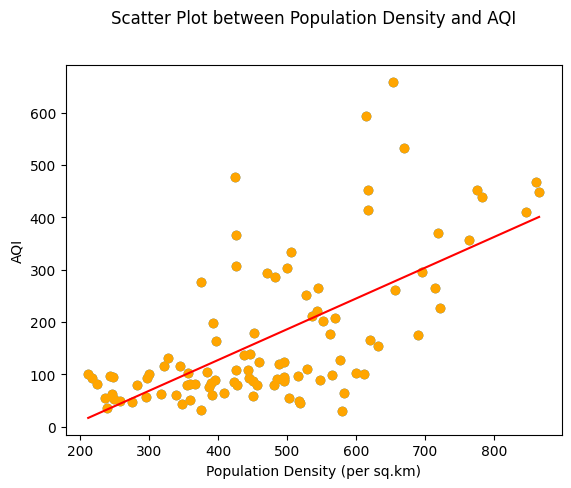

In [82]:
x,y = AQI['Population_Density'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y)
plt.scatter(x,y,color='orange')
plt.xlabel("Population Density (per sq.km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Population Density and AQI",pad=30)
plt.show()

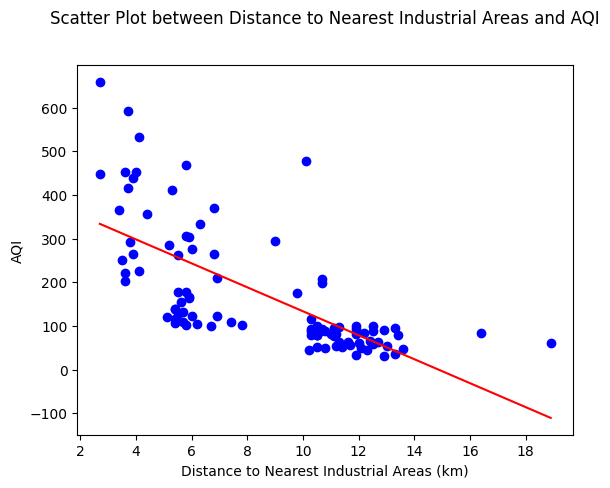

In [83]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='blue')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and AQI",pad=30)
plt.show()

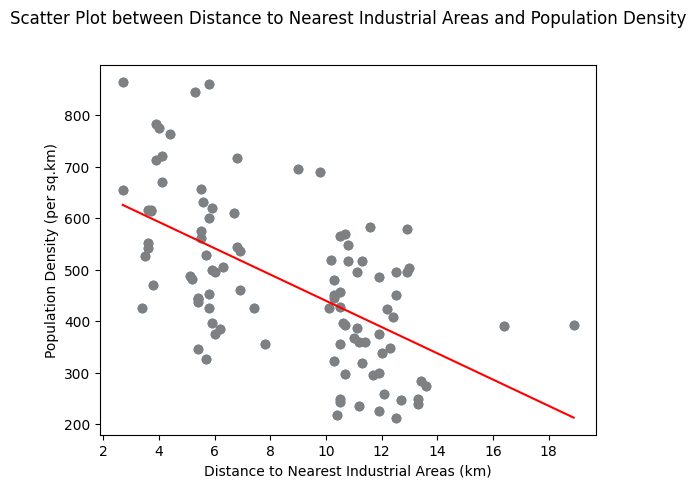

In [84]:
x,y = AQI['Proximity_to_Industrial_Areas'].values, AQI['Population_Density'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='grey')
plt.xlabel("Distance to Nearest Industrial Areas (km)")
plt.ylabel("Population Density (per sq.km)")
plt.title("Scatter Plot between Distance to Nearest Industrial Areas and Population Density",pad=30)
plt.show()

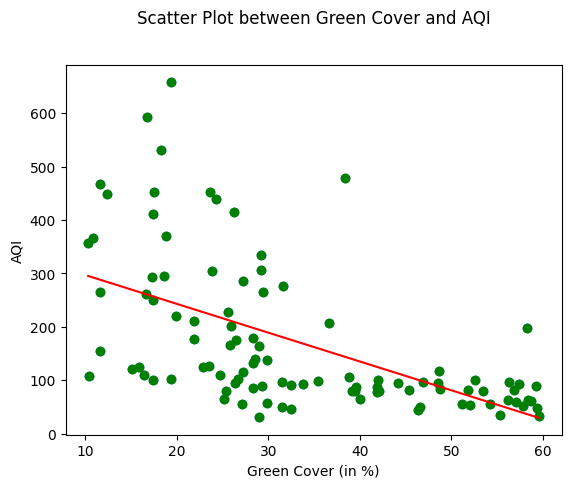

In [85]:
x,y = AQI['Green_Cover'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='green')
plt.xlabel("Green Cover (in %)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Green Cover and AQI",pad=30)
plt.show()

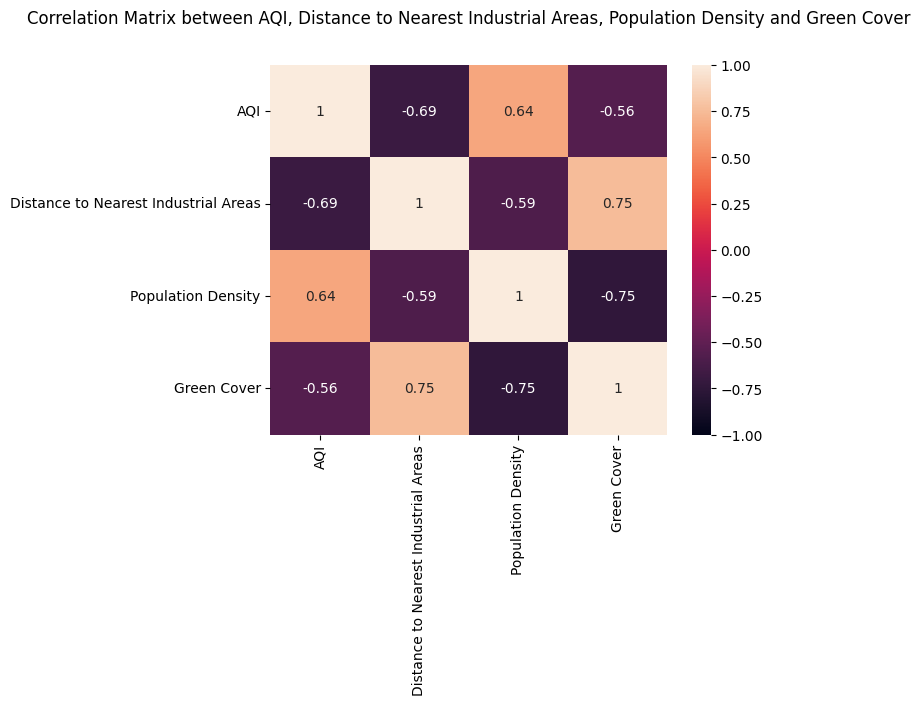

In [86]:
correlation = AQI[['AQI','Proximity_to_Industrial_Areas','Population_Density','Green_Cover']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True, xticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density','Green Cover'], yticklabels=['AQI','Distance to Nearest Industrial Areas','Population Density','Green Cover'])

plt.title("Correlation Matrix between AQI, Distance to Nearest Industrial Areas, Population Density and Green Cover", pad=30)
plt.show()

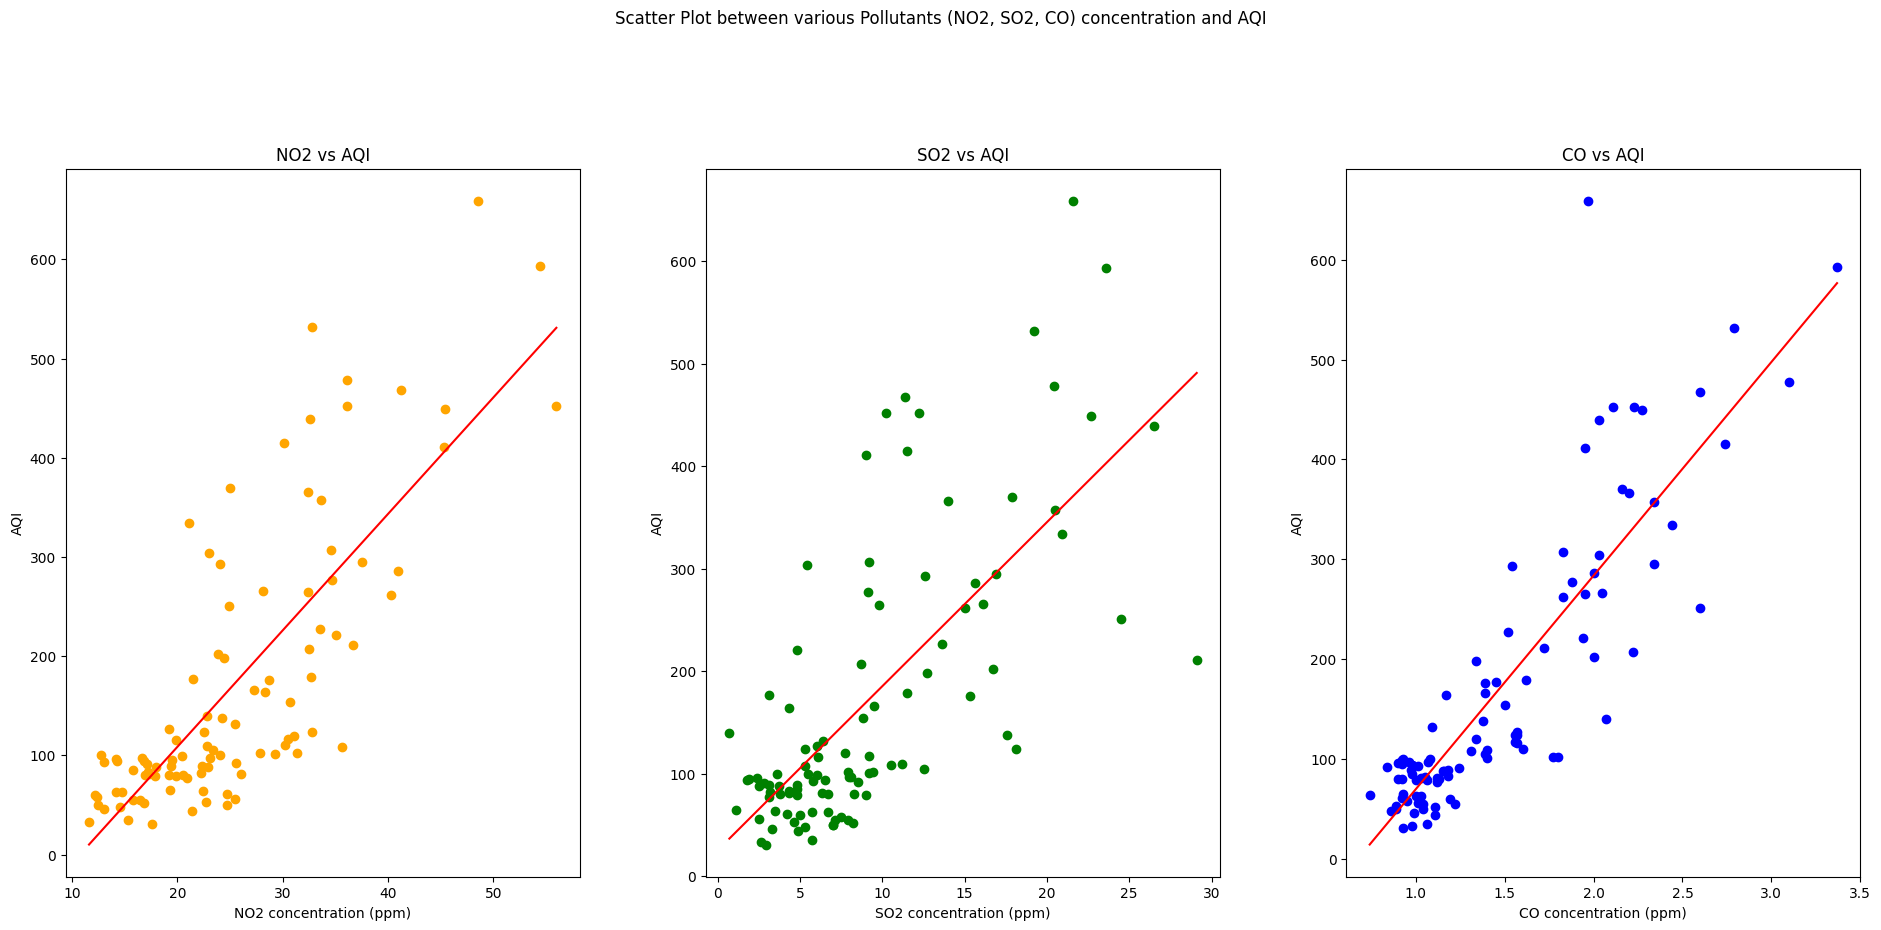

In [87]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle("Scatter Plot between various Pollutants (NO2, SO2, CO) concentration and AQI")

pollutants = ['NO2', 'SO2', 'CO']
colors = ['orange', 'green', 'blue']
for i, pollutant in enumerate(pollutants):
    x, y = AQI[pollutant].values, AQI['AQI'].values
    b, a = np.polyfit(x, y, 1)
    seq = np.linspace(min(x), max(x), 100)

    axes[i].scatter(x, y, color=colors[i])
    axes[i].plot(seq, a + b * seq, color='red')
    axes[i].set_xlabel(f"{pollutant} concentration (ppm)")
    axes[i].set_ylabel("AQI")
    axes[i].set_title(f"{pollutant} vs AQI")

plt.tight_layout(pad=5.0)
plt.show()


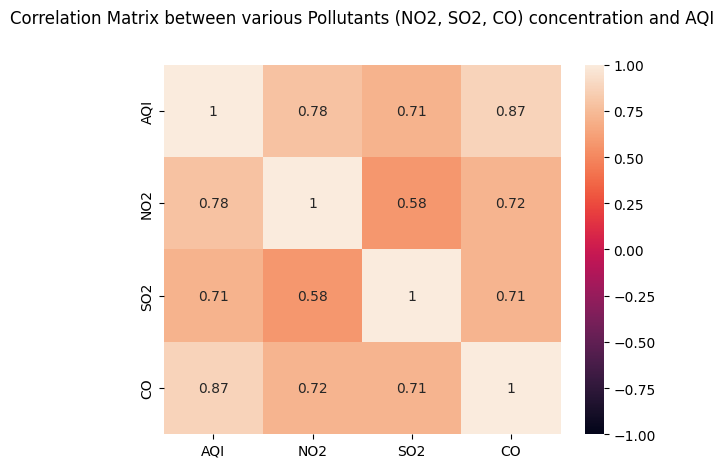

In [88]:
correlation = AQI[['AQI','NO2','SO2','CO']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True,)

plt.title("Correlation Matrix between various Pollutants (NO2, SO2, CO) concentration and AQI", pad=30)
plt.show()

In [89]:
AQI['Humidity'].describe()

count    100.000000
mean      66.834532
std       13.406841
min       38.400000
25%       57.350000
50%       66.400000
75%       77.381473
max       92.400000
Name: Humidity, dtype: float64

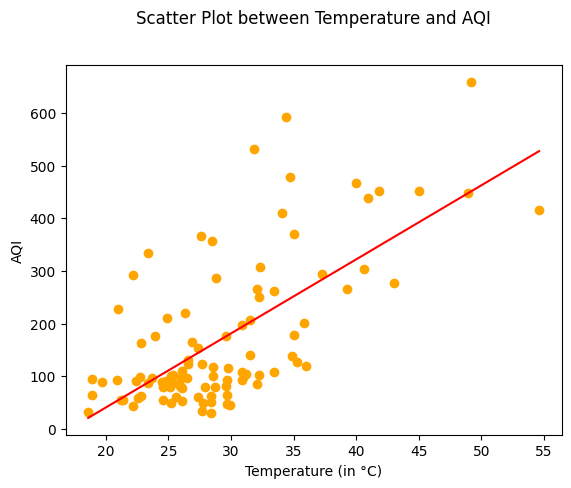

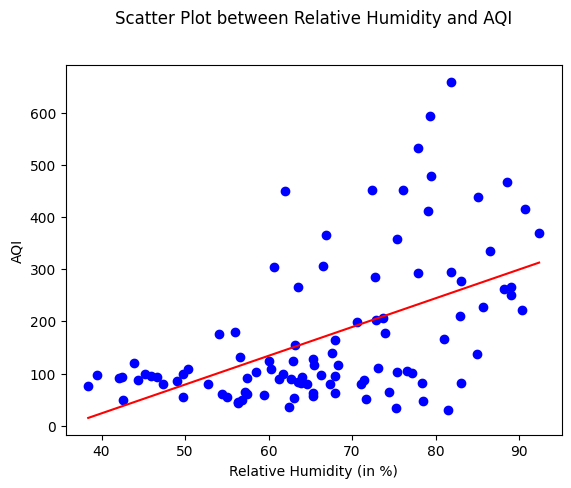

In [90]:
x,y = AQI['Temperature'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='orange')
plt.xlabel("Temperature (in °C)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Temperature and AQI",pad=30)
plt.show()

x,y = AQI['Humidity'].values, AQI['AQI'].values

b, a = np.polyfit(x,y,1)
seq = np.linspace(min(x),max(x),100)
plt.plot(seq, a+b*seq, color='red')

plt.scatter(x,y,color='blue')
plt.xlabel("Relative Humidity (in %)")
plt.ylabel("AQI")
plt.title("Scatter Plot between Relative Humidity and AQI",pad=30)
plt.show()

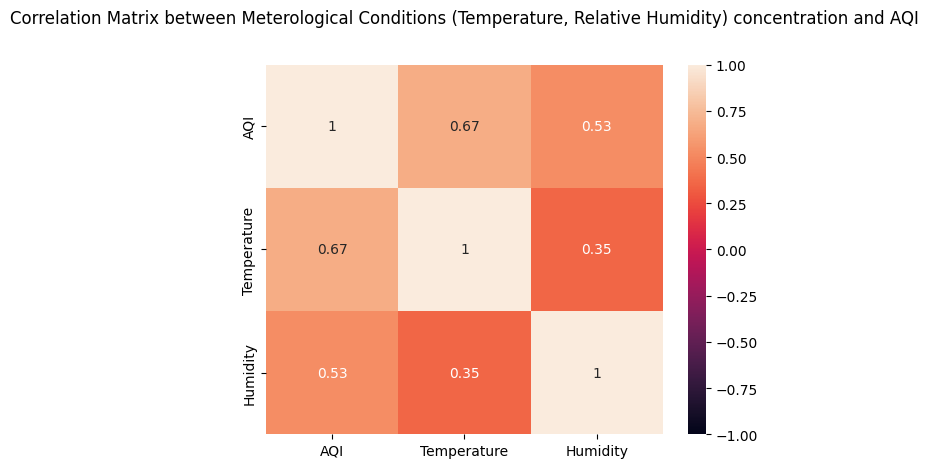

In [91]:
correlation = AQI[['AQI','Temperature','Humidity']].corr()

axis_corr = sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True,)

plt.title("Correlation Matrix between Meterological Conditions (Temperature, Relative Humidity) concentration and AQI", pad=30)
plt.show()